In [0]:
##Written by Roshan Noronha
##Date: August 29, 2019
##Purpose: The purpose of this notebook is to implement a convolutional neural network that can recognize dogs and cats.

In [0]:
#link google drive
#the trained model will be saved in google drive to be accessed later
#THIS IS IMPORTANT!
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#get dog and cat pictures from kaggle
#https://www.kaggle.com/general/74235
#command line commands are prefaced with a !

!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rnoronha00","key":"be561cde73fe12d9f28dacebf735dec8"}'}

In [0]:
#create a kaggle directory and move files the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change permissions of kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

#check that kaggle datasets show up
!kaggle datasets list

In [0]:
#get dog and cat pictures from kaggle
!kaggle competitions download -c dogs-vs-cats

In [0]:
#unzip training and testing data
!unzip train.zip -d train
!unzip test1.zip -d test

In [0]:
#the training folder has dog and cat images together. These need to be in two seperate folders.
!mkdir train/cats/
!mkdir train/dogs/
!mkdir models/

!find train/train/ | grep "/dog.[0-9]*.jpg" | xargs mv -t train/dogs/
!find train/train/ | grep "/cat.[0-9]*.jpg" | xargs mv -t train/cats/

In [0]:
#train folder is empty so it should be removed
rm -r train/train/

In [0]:
#install gpu-tensorflow and check version
!pip install tensorflow-gpu
import tensorflow as tf
print(tf.__version__)


In [0]:
#import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator, image, img_to_array
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D

Using TensorFlow backend.


In [0]:
#define paths to training and testing folders
train_data = "train/"
test_data = "test/test1/"

#preprocess images
#images should be the same size
img_width, img_height = 600, 600

#rescale pixel values from [0-255] to [0-1]
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(train_data, target_size= (img_width, img_height), batch_size= 32, class_mode= 'binary')

In [0]:
#define the CNN architecture
#sequential model is a linear stack of layers

model = Sequential()

#this CNN will have three layers
#relu is used for the activation function and allows the model to learn more complex functions
#max pooling keeps useful information while reducing dimentionality

model.add(Convolution2D(32,3,3, input_shape=(img_width,img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Convolution2D(32,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size= (2,2)))

#the features are flattened into one dimension
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

#dropout is added to prevent overfitting i.e. cannot generalize to new examples
#dropout randomly removes activations which forces the network to use other ones
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
#binary_crossentropy is the loss function that measures the inaccuracy of the prediction (backpropagation)
#it is used since we only have two categories
#the optimizer tweaks the weights of all the layers to minimize the error (gradient descent)
model.compile(loss = 'binary_crossentropy', optimizer= 'rmsprop', metrics = ['accuracy'])

In [0]:
##parameters for training the model
model.fit_generator(train_gen, samples_per_epoch = 2048, nb_epoch = 30)

#save the weights after model has been trained
model.save("drive/My Drive/Colab Notebooks/dognotadog/trainedmodels/dogsandcatsCNN-1.h5")

In [0]:
#mount Google Drive if needed
#from google.colab import drive
#drive.mount('/content/drive')

#load model
trainedmodel = load_model("drive/My Drive/Colab Notebooks/dognotadog/trainedmodels/dogsandcatsCNN-1.h5")

#get test data that has been seperated into dogs and cats
!kaggle datasets download -d chetankv/dogs-cats-images

#unzip training and testing data
!unzip dogs-cats-images.zip
!unzip dog\ vs\ cat.zip

#evaluate the effectiveness of the trained model
test_data = "dataset/test_set/"
test_gen = datagen.flow_from_directory(test_data, target_size= (img_width, img_height), batch_size= 32, class_mode= 'binary')
print(trainedmodel.metrics_names)
print(trainedmodel.evaluate_generator(test_gen))

['loss', 'acc']
[0.4515095429420471, 0.7975]


In [0]:
from google.colab import drive
drive.mount('/content/drive')

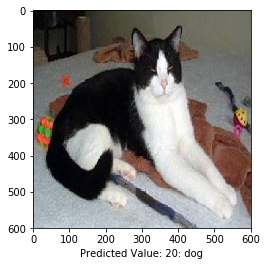

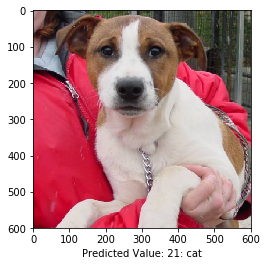

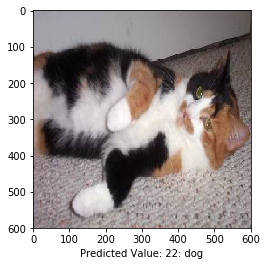

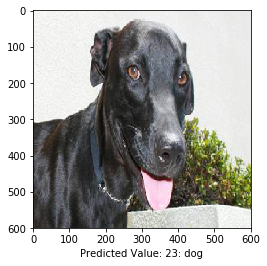

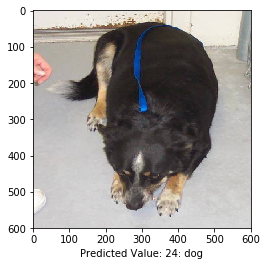

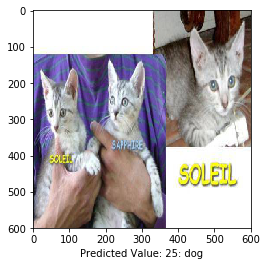

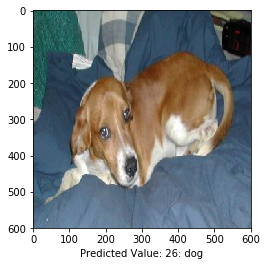

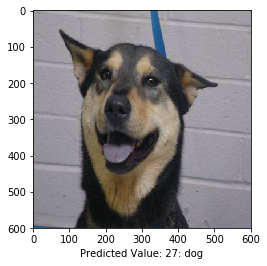

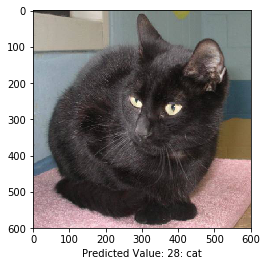

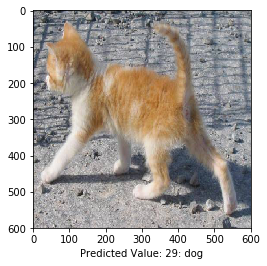

In [0]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(20, 30, 1):
  testImage = image.load_img("test/test1/" + str(i) + ".jpg", target_size= (600, 600))
  testImage = image.img_to_array(testImage)
  testImage = np.expand_dims(testImage, axis = 0)

  prediction = trainedmodel.predict(testImage)

  plt.imshow(image.load_img("test/test1/" + str(i) + ".jpg", target_size= (600, 600)))
  
  animal = ""
  if (int(prediction[0][0]) == 0):
    animal = str(i) + ": cat"
  else:
    animal = str(i) + ": dog"
    
  plt.xlabel("Predicted Value: " + animal)
  plt.show()
